In [8]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from matplotlib import pyplot as plt

In [2]:



def capture_photo(filename='image.jpg', quality=0.8):
  js = Javascript('''
    async function capturePhoto(quality)
     {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Clich here to take your photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('capturePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename



In [3]:
image_captured = capture_photo()



<IPython.core.display.Javascript object>

400 300


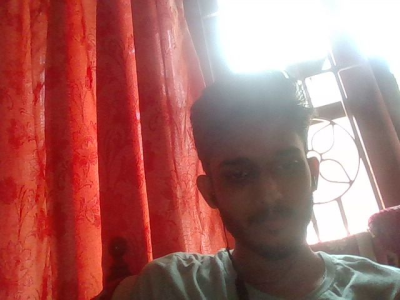

In [5]:
#image = cv2.imread(image_capture, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_captured)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

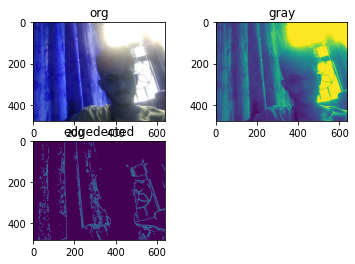

In [11]:
image = cv2.imread(image_captured)
greyim=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(image,150,150)
title=["org","gray","edgedected"]
image=[image,greyim,edge]
count=3
for i in range(count):
  plt.subplot(2,2,i+1)
  plt.title(title[i]);
  plt.imshow(image[i])
plt.show()